In [60]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [62]:
raw_data.shape

(20052, 680)

In [63]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [64]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

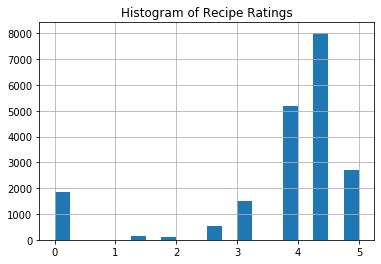

In [65]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [66]:
# Count the nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [67]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
svr.score(X, Y)

-0.003978314483867873

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pegahafshar/opt/an

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

this does not seem to have worked very well. In fact, it is remarkably poor! 

1. clean up your feature set. There might be some gains to be made by getting rid of the noise.
2. try removing the nulls but including dietary information, and see how that performs. 
3. take your regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, you might have better luck thinking of this as a classification problem
4. make it simpler still if, instead of classifying on each possible value, you group reviews to some specific high and low values.
5. Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [12]:
Y

235      3.125
12172    3.750
5192     4.375
17289    4.375
10955    5.000
         ...  
15578    3.750
3314     3.750
17437    3.750
6696     5.000
13130    3.750
Name: rating, Length: 6016, dtype: float64

In [17]:
Y_c=np.where(Y>3.5,'H','L')

In [18]:
Y_c

array(['L', 'H', 'H', ..., 'H', 'H', 'H'], dtype='<U1')

In [45]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
Y_c=np.where(Y>3.5,1,0)
svr.fit(X,Y_c)
svr.score(X, Y_c)

/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.01670679371421646

In [40]:
abs(raw_data.corr()['rating']).sort_values(ascending=False).head(40)

rating            1.000000
drink             0.241388
alcoholic         0.224767
house & garden    0.217911
gin               0.191400
spirit            0.146625
cocktail          0.140723
cocktail party    0.140482
bitters           0.137368
bon appétit       0.124549
harpercollins     0.105094
peanut free       0.096087
soy free          0.092965
liqueur           0.090757
rum               0.084689
tree nut free     0.081347
non-alcoholic     0.077476
bake              0.076978
condiment         0.076295
roast             0.073499
fall              0.067343
sauté             0.066553
brandy            0.065481
fortified wine    0.063814
pernod            0.062768
créme de cacao    0.061670
dinner            0.060957
weelicious        0.060289
chartreuse        0.059753
kosher            0.059071
lime juice        0.055399
winter            0.055126
pescatarian       0.054034
thanksgiving      0.052990
scotch            0.052490
pickles           0.051942
leftovers         0.051770
o

In [50]:
col2=['drink','alcoholic','house & garden','gin','spirit','cocktail','cocktail party','bitters','bon appétit'
     ,'harpercollins','peanut free','soy free','liqueur','rum','tree nut free','non-alcoholic',
    'bake','condiment','roast','fall','sauté','brandy','fortified wine','pernod','créme de cacao','dinner',
    'weelicious','chartreuse','kosher','lime juice','winter','pescatarian','thanksgiving','scotch','pickles','leftovers']

In [51]:
svr = SVR()
X2=raw_data[col2].sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
Y_c=np.where(Y>3.5,1,0)
svr.fit(X2,Y_c)
svr.score(X2, Y_c)

/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.012936437599275652

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X2, Y_c, cv=5)

/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pegahafshar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pegahafshar/opt/an

array([ 0.0195994 , -0.00024305, -0.00599152, -0.00098887,  0.01083586])

Data is biased and data is not a random sample. the people more likely to choose some kinds of recipes are also more likely to give high reviews.

In [53]:
raw_data.sample(3)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
15824,Sausage and Mushroom Penne Gratin,4.375,1106.0,55.0,57.0,1232.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11408,Peel-and-Eat Hot Pepper Shrimp,4.375,67.0,11.0,1.0,920.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,Grilled Yellow Squash with Oregano,4.375,219.0,1.0,17.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
raw_data.duplicated('title',keep='first').sum()

2316

In [55]:
raw_data.drop_duplicates('title',keep='first',inplace=True)

In [56]:
raw_data.dropna(axis=0,inplace=True)

In [57]:
raw_data.shape

(14015, 680)

In [58]:
raw_data.head(3)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col2=['drink','alcoholic','house & garden','gin','spirit','cocktail','cocktail party','bitters','bon appétit'
     ,'harpercollins','peanut free','soy free','liqueur','rum','tree nut free','non-alcoholic',
    'bake','condiment','roast','fall','sauté','brandy','fortified wine','pernod','créme de cacao','dinner',
    'weelicious','chartreuse','kosher','lime juice','winter','pescatarian','thanksgiving','scotch','pickles','leftovers']

In [85]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X=raw_data[col2]
Y = raw_data.rating
Y_c=np.where(Y>3.5,1,0)
X_train,X_test,y_train,y_test=train_test_split(X,Y_c)
clf = OneVsRestClassifier(SVC(kernel='linear'))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto_deprecated',
                                  kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [86]:
clf.score(X_test, y_test)

0.7965290245362059